In [1]:
from multiprocessing.dummy import Pool as ThreadPool
import requests
from bs4 import BeautifulSoup
import sqlite3

In [2]:
url = 'https://www.sport-express.ru/hockey/khl/news/?publicationDate=31.08.2008'
today_data = '23 июня '

In [30]:
class Parser():
    def __init__(self,url):
        self.url = url
        
    def get_response(self,url):
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        response.status_code
        return soup
        
    def url_chapters(self):
        before_page = self.url[:45]
        after_page = self.url[44:]
        return before_page, after_page
        print(before_page)
        print(after_page)
        #Разделение url ссылки на части
        
    def find_max_button(self):
        
        soup = self.get_response(self.url)
        next_page = soup.find_all('a', class_='se19-pagination__point')
        
        list_of_pages = []
        for i in range(len(next_page)-1):
            list_of_pages.append(int(next_page[i].text))
    
        max_page =  max(list_of_pages) 
        return max_page
       
    
    def find_links_of_pages(self,max_page,before_page,after_page):
        list_of_urls = [self.url]
        for i in range (2,max_page+1):
            link = before_page + 'page'+ str(i) + after_page
            list_of_urls.append(link)
        return list_of_urls
        #Сделать ограничение по дате
        
    def get_links_from_page(self,page_link):
        links = []
        soup = self.get_response(page_link)
        arcticles_blocks = soup.find_all('div', class_='se19-news-column2')
    
        for ab in arcticles_blocks:
            links.append(ab.find('a')['href'])
    
        
        return links
    
    def get_links_for_articles(self,list_of_urls):
        pool = ThreadPool(20)
        links = pool.map(self.get_links_from_page,list_of_urls)
        # Создание ссылок на все статьи
        return links
    
    def get_info(self,html):
        d = []
        
        soup = BeautifulSoup(html, 'html.parser')
        text = soup.find('h1', class_='publication-title title-h1 mh_auto').text + '.'
        text_block = soup.find('div', class_='js-swiptable-holder article_text publication mt_10 mb_15')
        for block in text_block.find_all('p'):
            text += ' ' + block.text
        d.append(text)

        data = soup.find('div', class_='mv_10', style="padding-left: 90px;").text.strip()
        data = self.edit_data(data)
        d.append(data)
        
        tags = soup.find_all('li', class_='tags-block__item')
        tag = ''
        for ab in tags:
            tag += ab.find('a', class_='tags-block__link').text.strip() + ' '
            
        d.append(tag)
        
        return d
    
    def edit_data(self,data):
        if data[2] == ':':
            data = today_data + data
        return data
        
        
        
    def get_list_of_article_in_page(self,urls): 
        list_of_htmls = []
        for i in urls:
            response = requests.get(i).text
            res = self.get_info(response)
            list_of_htmls.append(res)
        
        return list_of_htmls
    
    def get_list_of_articles(self,links_for_articles):
        pool = ThreadPool(40)
        results = pool.map(self.get_list_of_article_in_page,links_for_articles)
        
        return results
        
    
    

        
parser = Parser(url)    

In [31]:
chapters_of_pages = parser.url_chapters()
before_page = chapters_of_pages[0]
after_page = chapters_of_pages[1]

In [32]:
max_page = parser.find_max_button()
max_page

2919

In [33]:
list_of_urls = parser.find_links_of_pages(max_page,before_page,after_page)

In [34]:
links_for_articles = parser.get_links_for_articles(list_of_urls[:100])
links_for_articles

[['https://www.sport-express.ru/hockey/vhl/news/dmitriy-sokolov-i-esche-dva-forvarda-podpisali-probnye-kontrakty-s-farm-klubom-avangarda-1804220/',
  'https://www.sport-express.ru/hockey/khl/news/stala-izvestna-zarplata-napadayuschego-cska-okulova-1804193/',
  'https://www.sport-express.ru/hockey/khl/news/u-okulova-bylo-predlozhenie-ot-monrealya-1804189/',
  'https://www.sport-express.ru/hockey/khl/news/konstantin-okulov-prodolzhit-vystupat-za-cska-1804173/',
  'https://www.sport-express.ru/hockey/khl/news/19-letnie-forvardy-subhi-i-kachelovskiy-pereshli-v-sistemu-ak-barsa-iz-gomelya-1804170/',
  'https://www.sport-express.ru/hockey/khl/news/rtischev-sleduyuschiy-sezon-dolzhen-stat-udarnym-dlya-vseh-komand-vertikali-cska-1804130/',
  'https://www.sport-express.ru/hockey/khl/news/teylor-bek-stal-igrokom-minskogo-dinamo-1804122/',
  'https://www.sport-express.ru/hockey/khl/news/golkiper-serebryakov-vernulsya-v-admiral-1804120/',
  'https://www.sport-express.ru/hockey/khl/news/teylor-bek-

In [35]:
list_of_articles = parser.get_list_of_articles(links_for_articles[:3])

In [36]:
print(list_of_articles)

[[['Дмитрий Соколов и\xa0еще два форварда подписали пробные контракты с\xa0фарм-клубом «Авангарда». Нападающие Дмитрий Соколов, Николай Майоров и\xa0Руслан Господынько подписали пробные контракты с «Омскими крыльями»\xa0— фарм-клубом «Авангарда», сообщает сайт ВХЛ. 23-летний Соколов\xa0— воспитанник омского хоккея. На\xa0драфте НХЛ в\xa02016 году был выбран «Миннесотой» под общим 196-м номером. В\xa0АХЛ провел 117 матчей и\xa0набрал 57 (35+22) очков. За\xa0последние два сезона 21-летний Майоров сыграл в\xa0USHL 89 матчей, забросив 41 шайбу и\xa0отдав 27 результативных передач. 20-летний Господынько\xa0— выпускник школы «Металлурга». Последние три сезона провел в «Стальных лисах». Всего в\xa0МХЛ у\xa0него 181 матч, 45 заброшенных шайб и\xa054 результативные передачи.', '23 июня 2021, 19:10', 'ХК Авангард Дмитрий Соколов (хоккей) '], ['Стала известна зарплата нападающего ЦСКА Окулова. Нападающий ЦСКА Константин Окулов подписал двухлетний контракт с\xa0армейским клубом. Как стало известно

# Создание базы данных

In [37]:
class Database():

    def __init__(self):
        self.conn = sqlite3.connect(r'D:\DBfolder\exp_database.db')
        self.cursor = self.conn.cursor()
        
    def create_database_stucture(self,list_of_articles,links_for_articles):
        database_stucture = []
        for i in range(len(list_of_articles)):
            
            for j in range(len(list_of_articles[i])):
                line = []
                line.append(links_for_articles[i][j])
                for k in range(len(list_of_articles[i][j])):
                    line.append(list_of_articles[i][j][k])
                database_stucture.append(line)
        return database_stucture
    
    def create_database(self):
        self.cursor.execute("""CREATE TABLE IF NOT EXISTS database(
                       link TEXT PRIMARY KEY,
                       text TEXT,
                       date TEXT,
                       tags TEXT);
                        """)
        self.conn.commit()
        
    def insert_database(self,list_of_articles,links_for_articles):
        sql = """INSERT INTO database(link,text,date,tags) VALUES (?, ?, ?, ?) """
        database_structure = self.create_database_stucture(list_of_articles,links_for_articles)
        for i in database_structure:
            self.cursor.execute(sql,i)
        self.conn.commit()
        
    def get_request(self):
        request = str(input('Ваш запрос: '))
        self.cursor.execute(request)
        results = self.cursor.fetchall()
        return print(results)
        
        
        

        
                
                    
            
        
db = Database()    

In [38]:
a = db.create_database_stucture(list_of_articles,links_for_articles)

In [39]:
a

[['https://www.sport-express.ru/hockey/vhl/news/dmitriy-sokolov-i-esche-dva-forvarda-podpisali-probnye-kontrakty-s-farm-klubom-avangarda-1804220/',
  'Дмитрий Соколов и\xa0еще два форварда подписали пробные контракты с\xa0фарм-клубом «Авангарда». Нападающие Дмитрий Соколов, Николай Майоров и\xa0Руслан Господынько подписали пробные контракты с «Омскими крыльями»\xa0— фарм-клубом «Авангарда», сообщает сайт ВХЛ. 23-летний Соколов\xa0— воспитанник омского хоккея. На\xa0драфте НХЛ в\xa02016 году был выбран «Миннесотой» под общим 196-м номером. В\xa0АХЛ провел 117 матчей и\xa0набрал 57 (35+22) очков. За\xa0последние два сезона 21-летний Майоров сыграл в\xa0USHL 89 матчей, забросив 41 шайбу и\xa0отдав 27 результативных передач. 20-летний Господынько\xa0— выпускник школы «Металлурга». Последние три сезона провел в «Стальных лисах». Всего в\xa0МХЛ у\xa0него 181 матч, 45 заброшенных шайб и\xa054 результативные передачи.',
  '23 июня 2021, 19:10',
  'ХК Авангард Дмитрий Соколов (хоккей) '],
 ['ht

In [ ]:
db.create_database()

In [ ]:
db.insert_database(list_of_articles,links_for_articles)

In [ ]:
#Запрос: SELECT date FROM database

In [355]:
db.get_request()

Ваш запрос: SELECT text FROM database
[('Дмитрий Соколов и\xa0еще два форварда подписали пробные контракты с\xa0фарм-клубом «Авангарда». Нападающие Дмитрий Соколов, Николай Майоров и\xa0Руслан Господынько подписали пробные контракты с «Омскими крыльями»\xa0— фарм-клубом «Авангарда», сообщает сайт ВХЛ. 23-летний Соколов\xa0— воспитанник омского хоккея. На\xa0драфте НХЛ в\xa02016 году был выбран «Миннесотой» под общим 196-м номером. В\xa0АХЛ провел 117 матчей и\xa0набрал 57 (35+22) очков. За\xa0последние два сезона 21-летний Майоров сыграл в\xa0USHL 89 матчей, забросив 41 шайбу и\xa0отдав 27 результативных передач. 20-летний Господынько\xa0— выпускник школы «Металлурга». Последние три сезона провел в «Стальных лисах». Всего в\xa0МХЛ у\xa0него 181 матч, 45 заброшенных шайб и\xa054 результативные передачи.',), ('Стала известна зарплата нападающего ЦСКА Окулова. Нападающий ЦСКА Константин Окулов подписал двухлетний контракт с\xa0армейским клубом. Как стало известно «СЭ», зарплата игрока сос

# Аналитика

In [119]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
import numpy as np

In [14]:
def get_text(list_of_articles):
    text = ''
    
    for i in range(len(list_of_articles)):
        
        for j in range(len(list_of_articles[i])):
            
            for k in range(len(list_of_articles[i][j])):
                text += list_of_articles[i][j][k] + ' '
            text = text.lower()
            
                
            
    return text
            
    

In [15]:
text = get_text(list_of_articles)
text

'дмитрий соколов и\xa0еще два форварда подписали пробные контракты с\xa0фарм-клубом «авангарда». нападающие дмитрий соколов, николай майоров и\xa0руслан господынько подписали пробные контракты с «омскими крыльями»\xa0— фарм-клубом «авангарда», сообщает сайт вхл. 23-летний соколов\xa0— воспитанник омского хоккея. на\xa0драфте нхл в\xa02016 году был выбран «миннесотой» под общим 196-м номером. в\xa0ахл провел 117 матчей и\xa0набрал 57 (35+22) очков. за\xa0последние два сезона 21-летний майоров сыграл в\xa0ushl 89 матчей, забросив 41 шайбу и\xa0отдав 27 результативных передач. 20-летний господынько\xa0— выпускник школы «металлурга». последние три сезона провел в «стальных лисах». всего в\xa0мхл у\xa0него 181 матч, 45 заброшенных шайб и\xa054 результативные передачи. 23 июня 2021, 19:10 хк авангард дмитрий соколов (хоккей)  стала известна зарплата нападающего цска окулова. нападающий цска константин окулов подписал двухлетний контракт с\xa0армейским клубом. как стало известно «сэ», зарплат

In [16]:
text = text.lower()

In [17]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
spec_chars = string.punctuation + '\n\xa0«»\t—…' 

In [19]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [20]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [21]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [22]:
import nltk
text = nltk.Text(text_tokens)

In [23]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

In [24]:
fdist.most_common(5)

[('хк', 115), ('в', 101), ('июня', 96), ('контракт', 53), ('клуба', 53)]

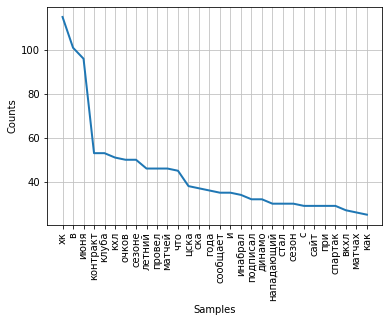

In [25]:
fdist.plot(30,cumulative=False)

In [44]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['в', 'с','и',"как","что","при",'вкхл',"вминувшем","стал",'это'])

In [45]:

tokens_without_sw = [word for word in text_tokens if not word in russian_stopwords ]

fdist_sw = FreqDist(tokens_without_sw)

In [46]:
fdist_sw.most_common(10)

[('хк', 115),
 ('июня', 96),
 ('контракт', 53),
 ('клуба', 53),
 ('кхл', 51),
 ('очков', 50),
 ('сезоне', 50),
 ('летний', 46),
 ('провел', 46),
 ('матчей', 46)]

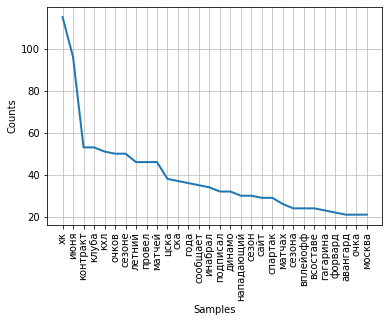

In [47]:
fdist_sw.plot(30,cumulative=False)